In [91]:
%load_ext autoreload

%autoreload 2
import numpy as np
import pickle
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin,  )
def save_pickle(dat, filename, **kwargs):
    file = open(filename,'wb')
    pickle.dump(dat, file)
    file.close()
import corner, sys
import emcee
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")
params = {
    "font.family": "serif",
    "font.serif": ["Times", "Times New Roman", "DejaVu Serif"],
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.usetex": True,
    "figure.figsize": [3.386, 3.386],
    "figure.dpi": 300,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.05,
    "axes.linewidth": 0.8,
    "xtick.major.width": 0.8,
    "ytick.major.width": 0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
}
plt.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
gammas, ecps, tarps = (np.array([0.9996  , 0.989618, 0.979636, 0.969654, 0.959672, 0.94969 ,
        0.939708, 0.929726, 0.919744, 0.909762, 0.89978 , 0.889798,
        0.879816, 0.869834, 0.859852, 0.84987 , 0.839888, 0.829906,
        0.819924, 0.809942, 0.79996 , 0.789978, 0.779996, 0.770014,
        0.760032, 0.75005 , 0.740068, 0.730086, 0.720104, 0.710122,
        0.70014 , 0.690158, 0.680176, 0.670194, 0.660212, 0.65023 ,
        0.640248, 0.630266, 0.620284, 0.610302, 0.60032 , 0.590338,
        0.580356, 0.570374, 0.560392, 0.55041 , 0.540428, 0.530446,
        0.520464, 0.510482, 0.5005  , 0.490518, 0.480536, 0.470554,
        0.460572, 0.45059 , 0.440608, 0.430626, 0.420644, 0.410662,
        0.40068 , 0.390698, 0.380716, 0.370734, 0.360752, 0.35077 ,
        0.340788, 0.330806, 0.320824, 0.310842, 0.30086 , 0.290878,
        0.280896, 0.270914, 0.260932, 0.25095 , 0.240968, 0.230986,
        0.221004, 0.211022, 0.20104 , 0.191058, 0.181076, 0.171094,
        0.161112, 0.15113 , 0.141148, 0.131166, 0.121184, 0.111202,
        0.10122 , 0.091238, 0.081256, 0.071274, 0.061292, 0.05131 ,
        0.041328, 0.031346, 0.021364, 0.011382, 0.0014  ]), np.array([1.        , 0.989     , 0.97900003, 0.97200006, 0.96400005,
        0.95000005, 0.94100004, 0.933     , 0.91700006, 0.90800005,
        0.90200007, 0.89500004, 0.8880001 , 0.87600005, 0.864     ,
        0.859     , 0.85      , 0.84200007, 0.82600003, 0.82000005,
        0.809     , 0.79300004, 0.78200006, 0.77300006, 0.762     ,
        0.75100005, 0.74300003, 0.734     , 0.71500003, 0.70100003,
        0.693     , 0.68      , 0.67600006, 0.669     , 0.661     ,
        0.65400004, 0.64000005, 0.633     , 0.62100005, 0.60700005,
        0.596     , 0.592     , 0.586     , 0.574     , 0.568     ,
        0.559     , 0.555     , 0.544     , 0.532     , 0.52900004,
        0.523     , 0.51500005, 0.51000005, 0.497     , 0.485     ,
        0.476     , 0.46600002, 0.46      , 0.45700002, 0.44500002,
        0.439     , 0.43100002, 0.42600003, 0.416     , 0.41300002,
        0.40800002, 0.40100002, 0.39600003, 0.39100003, 0.38500002,
        0.381     , 0.37100002, 0.35500002, 0.349     , 0.34100002,
        0.33400002, 0.326     , 0.31100002, 0.30800003, 0.30200002,
        0.298     , 0.293     , 0.28800002, 0.279     , 0.27400002,
        0.26700002, 0.26500002, 0.259     , 0.25100002, 0.24800001,
        0.24000001, 0.23500001, 0.23300001, 0.22800002, 0.223     ,
        0.216     , 0.208     , 0.20400001, 0.19800001, 0.19800001,
        0.19800001]), np.array([ 1.0000000e+00,  9.9400000e-01,  9.7900000e-01,  9.7200000e-01,
         9.6100000e-01,  9.5100000e-01,  9.3700000e-01,  9.2700000e-01,
         9.1600000e-01,  9.0800000e-01,  8.9900000e-01,  8.8700000e-01,
         8.7600000e-01,  8.6500000e-01,  8.5100000e-01,  8.4300000e-01,
         8.2900000e-01,  8.1800000e-01,  8.1000000e-01,  8.0400000e-01,
         7.9200000e-01,  7.7500000e-01,  7.6800000e-01,  7.5100000e-01,
         7.4400000e-01,  7.3000000e-01,  7.2000000e-01,  7.1000000e-01,
         6.9700000e-01,  6.8900000e-01,  6.7900000e-01,  6.7100000e-01,
         6.6100000e-01,  6.5400000e-01,  6.5000000e-01,  6.4100000e-01,
         6.3000000e-01,  6.2400000e-01,  6.1300000e-01,  6.0400000e-01,
         5.9500000e-01,  5.8100000e-01,  5.6600000e-01,  5.6000000e-01,
         5.5400000e-01,  5.4000000e-01,  5.3400000e-01,  5.2400000e-01,
         5.1500000e-01,  5.0000000e-01,  4.8700000e-01,  4.7400000e-01,
         4.6100000e-01,  4.5600000e-01,  4.4700000e-01,  4.4000000e-01,
         4.3200000e-01,  4.2000000e-01,  4.1300000e-01,  4.0600000e-01,
         3.9800000e-01,  3.8800000e-01,  3.8000000e-01,  3.6900000e-01,
         3.6000000e-01,  3.5500000e-01,  3.3700000e-01,  3.2900000e-01,
         3.2000000e-01,  3.1400000e-01,  3.1200000e-01,  3.0300000e-01,
         2.9100000e-01,  2.7700000e-01,  2.6800000e-01,  2.5700000e-01,
         2.4300000e-01,  2.3900000e-01,  2.3000000e-01,  2.2300000e-01,
         2.1900000e-01,  2.0500000e-01,  1.9200000e-01,  1.8500000e-01,
         1.7600000e-01,  1.6600000e-01,  1.4900000e-01,  1.3800000e-01,
         1.2800000e-01,  1.2000000e-01,  1.0800000e-01,  1.0400000e-01,
         9.6000000e-02,  7.9000000e-02,  7.2000000e-02,  6.0000000e-02,
         4.6000000e-02,  4.1000000e-02,  2.5000000e-02,  1.4000000e-02,
        -4.4408921e-16]))

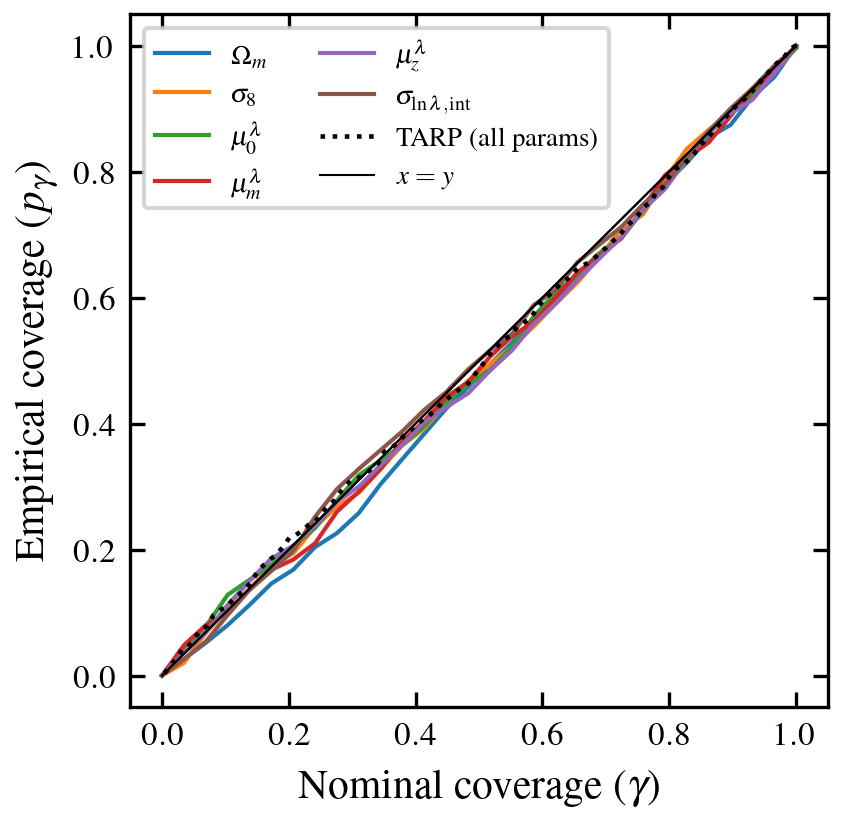

In [153]:
save_dir = f'../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/'
key_post_ = 'count_Nm'
mask_empty_bins = False
restricted_center = True
coverage_count_Nm_masked = load_pickle(save_dir + 'coverage_data_count_Nm_restricted_center.pkl')
p_label = [r'$\Omega_m$', r'$\sigma_8$', r'$\mu^\lambda_0$', r'$\mu^\lambda_m$',r'$\mu^\lambda_z$',r'$\sigma_{\ln \lambda, \rm int}$']
num_params = len(p_label)
plt.figure(figsize=(3,3))
for p in range(num_params):
    plt.plot(coverage_count_Nm_masked['alphas'], coverage_count_Nm_masked['coverages'][:, p],'-', label=p_label[p], lw=1)
plt.plot([0,1], [0,1], 'k-', lw=0.5, zorder=110)
plt.xlabel(r'Nominal coverage ($\gamma$)')
plt.ylabel(r'Empirical coverage ($p_\gamma$)')
plt.plot(gammas, tarps, label = 'TARP (all params)', c='k', lw=1.1, ls=':')
plt.plot([0,1], [0,1], 'k-', lw=0.5, zorder=110, label = r'$x=y$')
#plt.title(key_post_)
plt.legend(fontsize=6.5, ncols=2)
#plt.grid(True)
masked = '_masked' if mask_empty_bins else ''
restricted = '_restricted_center' if restricted_center else ''
plt.savefig(f"coverage_plot_{key_post_}{masked}{restricted}.png", dpi=300, bbox_inches='tight')

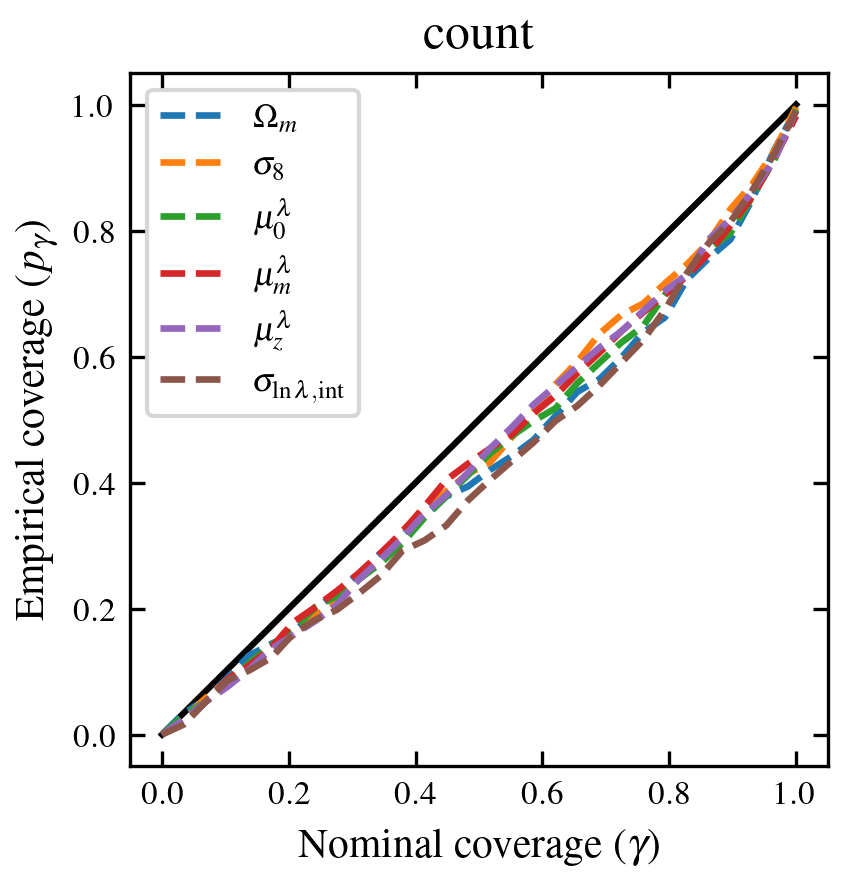

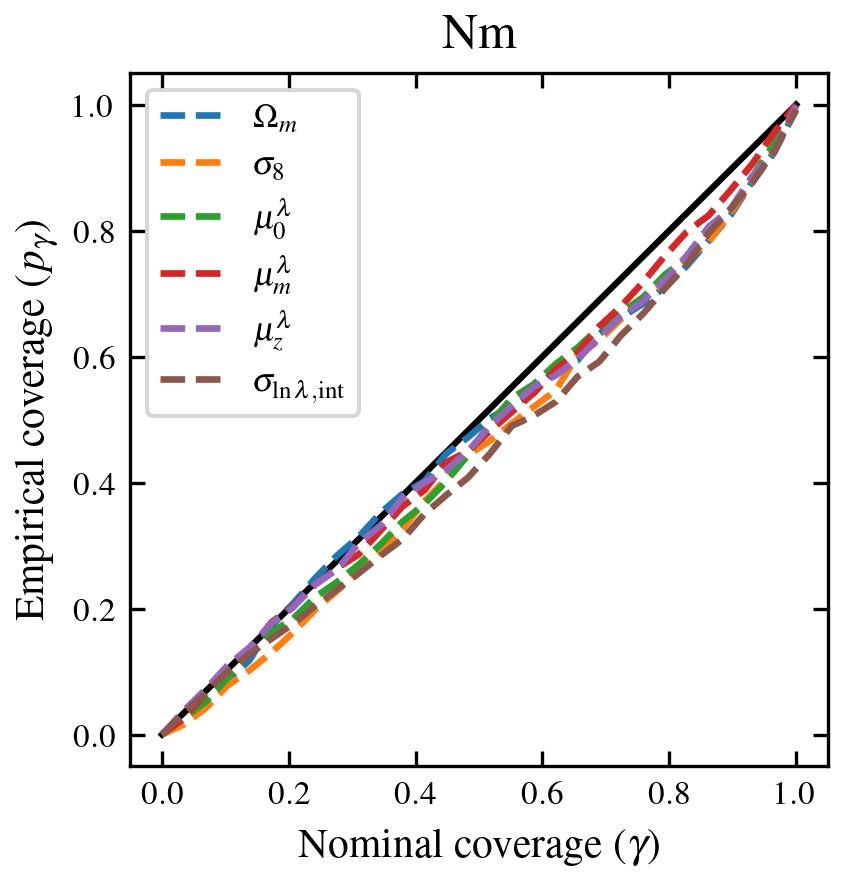

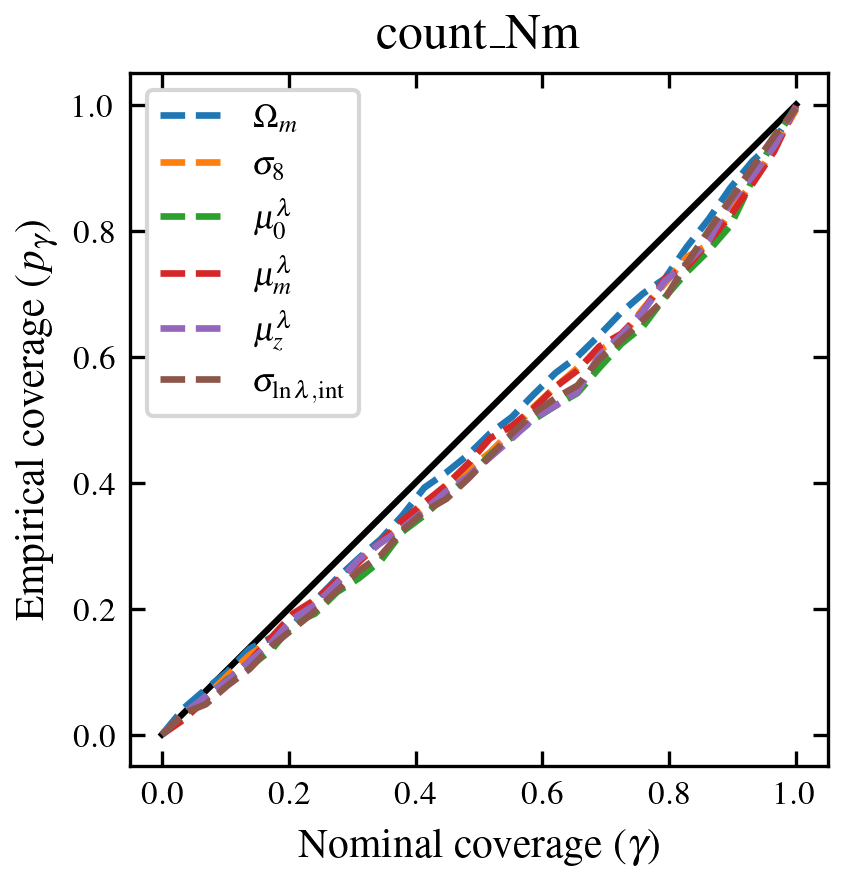

In [127]:
for key_post in ['count', 'Nm', 'count_Nm']:
    save_dir = f'../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/'
    #key_post_ = 'count_Nm'
    mask_empty_bins = False
    restricted_center = True
    coverage_count_Nm_masked = load_pickle(save_dir + f'coverage_data_{key_post}.pkl')
    p_label = [r'$\Omega_m$', r'$\sigma_8$', r'$\mu^\lambda_0$', r'$\mu^\lambda_m$',r'$\mu^\lambda_z$',r'$\sigma_{\ln \lambda, \rm int}$']
    num_params = len(p_label)
    plt.figure(figsize=(3,3))
    for p in range(num_params):
        plt.plot(coverage_count_Nm_masked['alphas'], coverage_count_Nm_masked['coverages'][:, p],'--', label=p_label[p], lw=1.6)
    plt.plot([0,1], [0,1], 'k-', zorder=0)
    plt.xlabel(r'Nominal coverage ($\gamma$)')
    plt.ylabel(r'Empirical coverage ($p_\gamma$)')
    plt.title(key_post)
    plt.legend()
    #plt.grid(True)
    masked = '_masked' if mask_empty_bins else ''
    restricted = '_restricted_center' if restricted_center else ''
    plt.savefig(f"coverage_plot_{key_post}{masked}{restricted}.png", dpi=300, bbox_inches='tight')

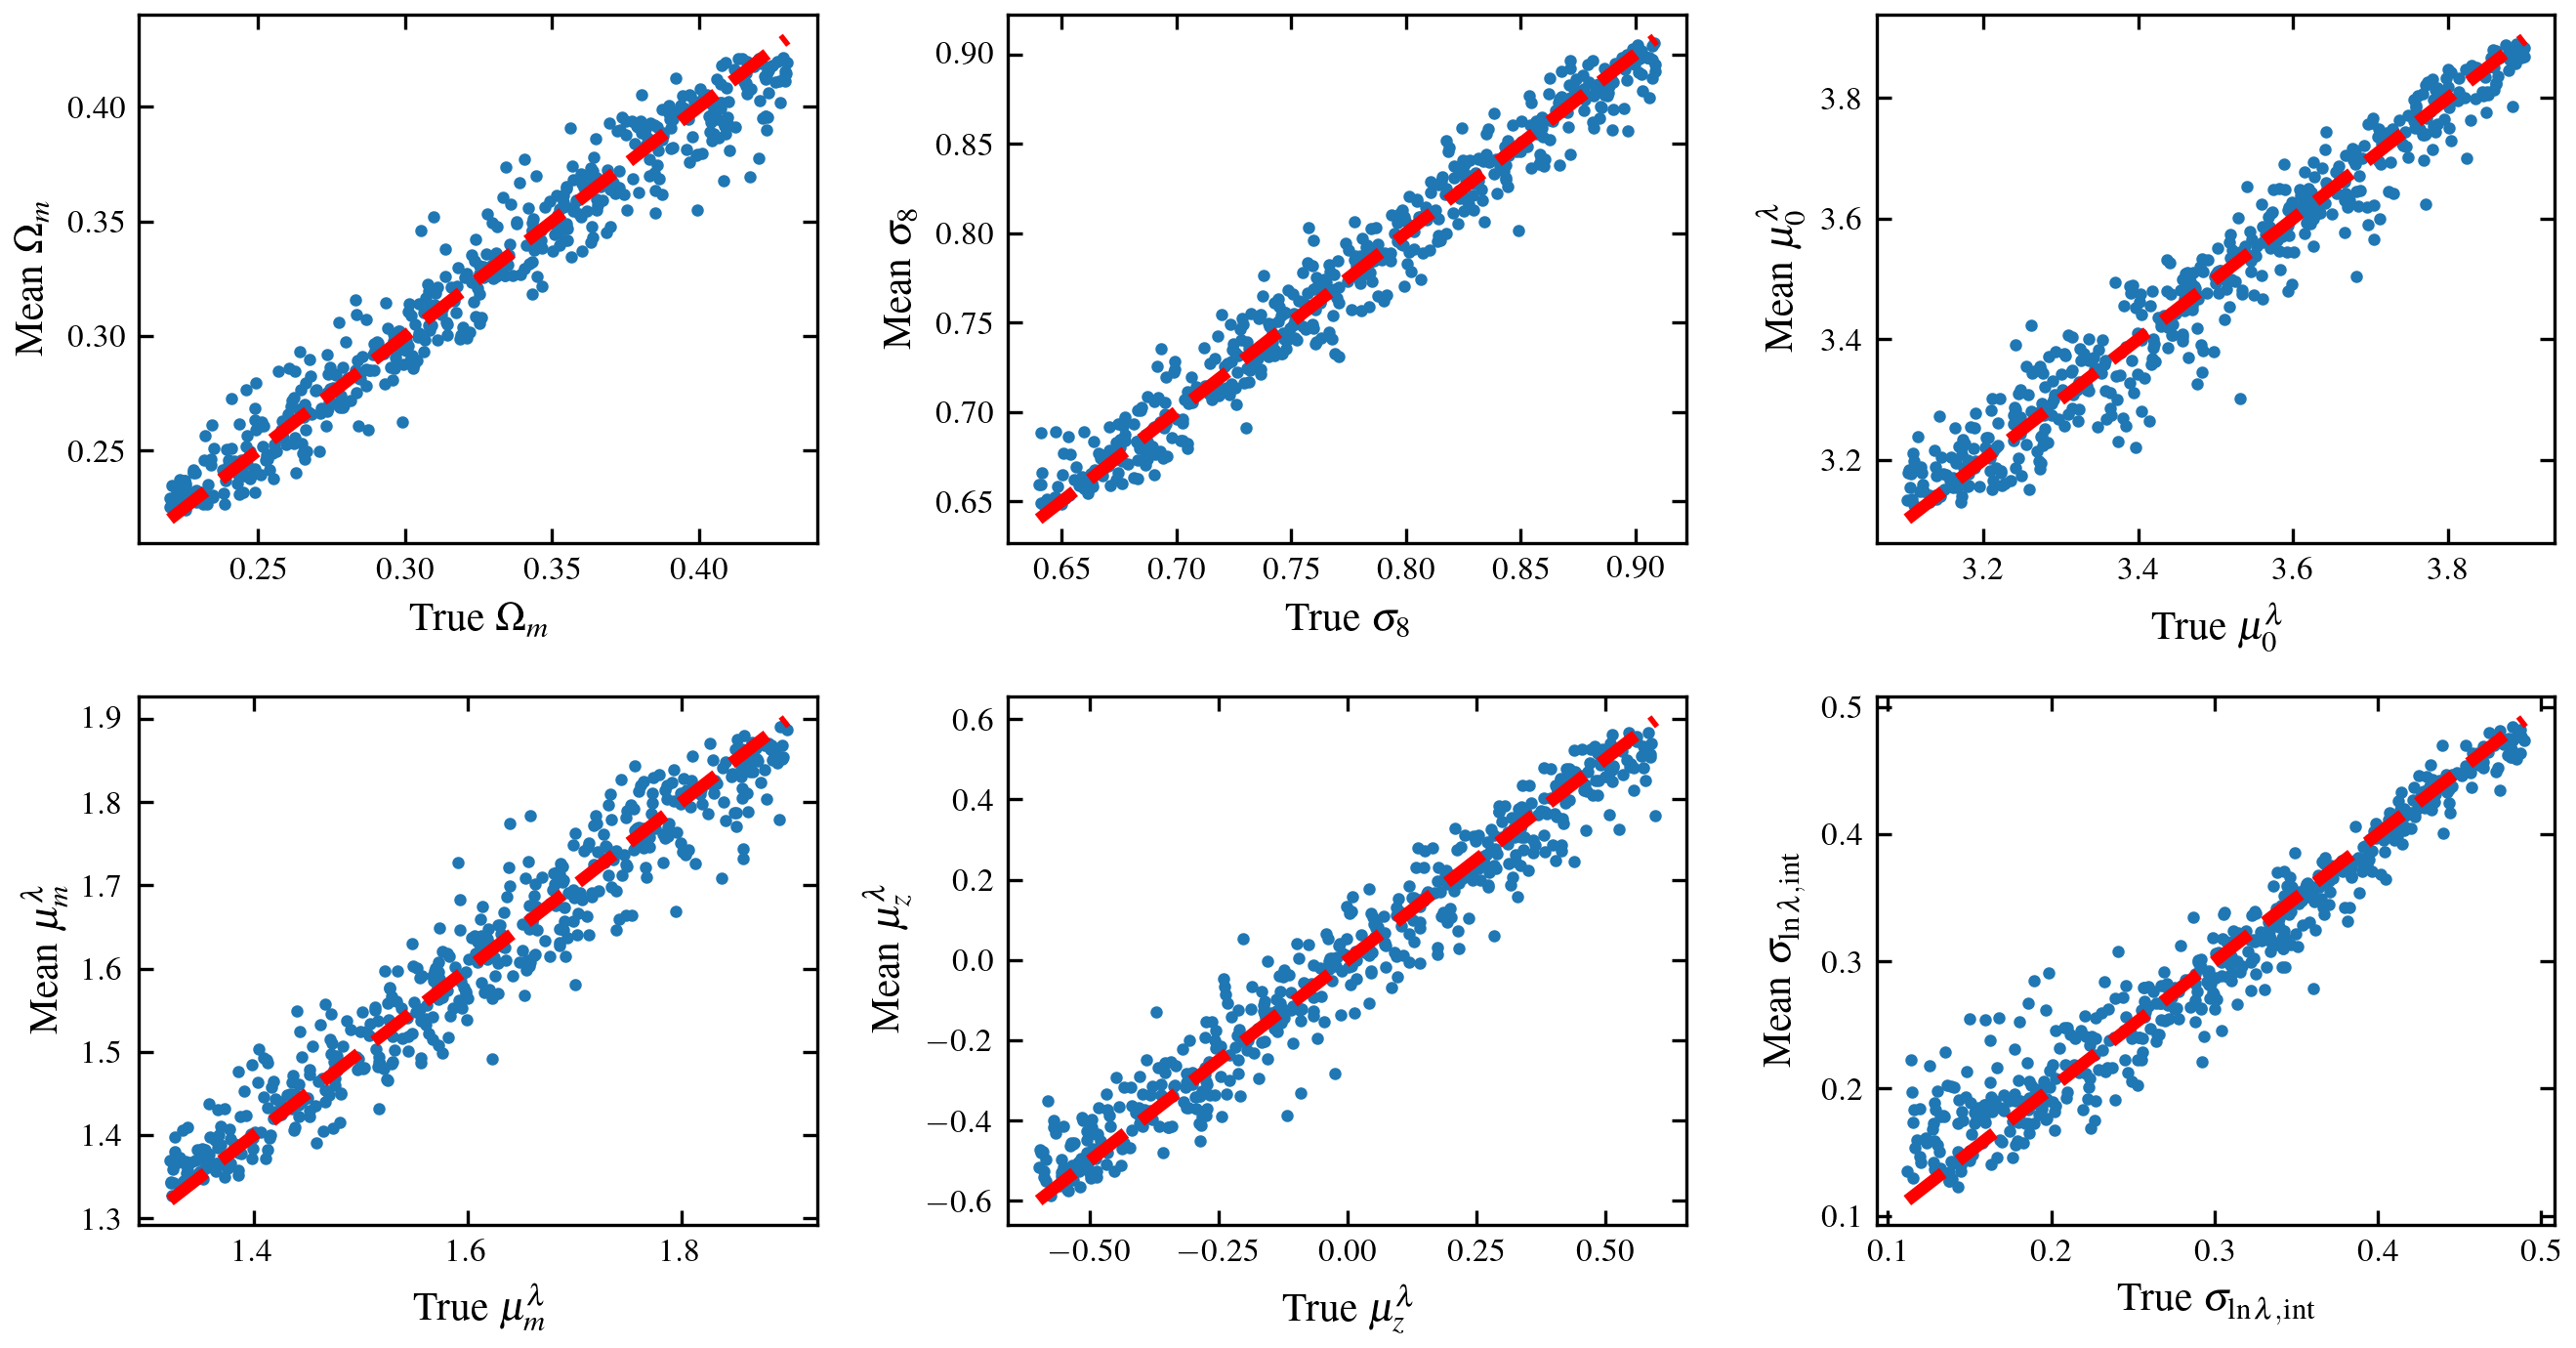

In [116]:
bias_count_Nm = load_pickle(save_dir + 'bias_data_count_Nm_restricted_center.pkl')
theta_true_all = bias_count_Nm['theta_true']
theta_mean_all = bias_count_Nm['theta_mean']

fig, axes = plt.subplots(2, 3, figsize=(9,5), sharex=False)
axes = axes.flatten()
        
for p in range(num_params):
    ax = axes[p]

    ax.scatter(
        theta_true_all[:, p],
        theta_mean_all[:, p],
        s=4,
        alpha=1, c='C0',
    )

    x = np.linspace(np.min(theta_true_all[:, p]), np.max(theta_true_all[:, p]), 10)

    ax.plot(x,x, color='r', ls='--', linewidth=3, zorder=1000)

    ax.set_xlabel('True ' + p_label[p])
    ax.set_ylabel('Mean ' + p_label[p])
#ax.set_title(p_label[p])
    #ax.grid(True)

#fig.suptitle("Bias per parameter – " + key_post_, fontsize=12)
fig.tight_layout(rect=[0, 0, 1, 0.96])
#fig.savefig(
#            f"bias_subplot_{key_post_}{masked}{restricted}.png",
#            dpi=300,
#            bbox_inches="tight")

- samples (ndarray) – the samples to compute the coverage of, with shape (n_samples, n_sims, n_dims).
- theta (ndarray) – the true parameter values for each samples, with shape (n_sims, n_dims).

In [123]:
samples_tarp = load_pickle(save_dir +"tarp_sample_count_Nm_restricted_center.pkl")

In [124]:
samples = np.array(samples_tarp['sample'])   # (n_sims, n_samples, n_dims)
samples = np.transpose(samples, (1, 0, 2)) 
save_pickle(samples, 'samples_tarp.pkl')

In [125]:
samples.shape

(5000, 1000, 6)

In [126]:
theta_true = samples_tarp['theta']
print(theta_true.shape)
save_pickle(theta_true, 'theta_tarp.pkl')

(1000, 6)
